___

<a href='https://www.instagram.com/lanlearning/'> <img src='images/logosmall.png' width="100" height="100"/></a>
___
<center>Copyright LanLearning 2020</center>




# Visualization Demo from Day 1

Note for ths demo to work, the exact same Google Form provided must be used. 

You will need to create the EXACT same Google form as the one in this link: https://forms.gle/UFTGo8SbvDx3N5mv9.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Who are your classmates? 

In this notebook, we will be showing various data visualizations based on your responses to our survey! These visuals should give us a little insight about our class! 

Let's take a look:

## Importing the Data 

First thing's first, we need to import that dataset!

In [ ]:
classroom = pd.read_csv('day1.csv')
classroom.head()

## Cleaning and Organizing:
A little bit of data cleaning and processing will help our code be little more readable and easier to write!

We will be refering to column names a lot, so it's a good idea to change the from long qustions to simple, easy-to-use titles. 

In [3]:
classroom.columns = ['Timestamp', 'First Name', "Last Name",'Color', 'Subject', 'Year', 'Height', 'Sleep', 'Study', 
                     'Shoe Size', 'Social', 'Creature', 'Pets', ]
classroom.head()

,Timestamp,First Name,Last Name,Color,Subject,Year,Height,Sleep,Study,Shoe Size,Social,Creature,Pets
0,6/22/2020 13:23:50,Shireen,Katyal,Blue,History,Junior,NaN,9,2,7.0,Instagram,Unicorn,0
1,6/22/2020 13:23:54,Mya,Nguyen,Purple,Math,Sophomore,61.0,9,2,7.0,Tik Tok,Unicorn,0
2,6/22/2020 13:23:57,Jay,Telmo,Pink,Art,Senior,67.0,2,5,8.0,Instagram,Doggle (Dog-Eagle),2
3,6/22/2020 13:23:58,Cynthia,Xia,Blue,Biology,Senior,63.0,8,3,6.0,Twitter,Unicorn,0
4,6/22/2020 13:24:00,Kyra,Yee,Red,Physics,Senior,67.0,8,4,9.0,Instagram,Puffaroo,0


## Names! 

What letter of the alphabet most of our names start with? 

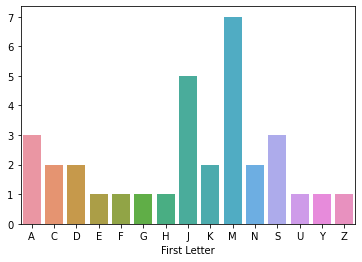

In [4]:
# this code creates the visual below
def first_let(s):
    return s[0].upper()

classroom['First Letter'] = classroom['First Name'].apply(first_let)
grouped_first = classroom.groupby('First Letter').count()
grouped_first = grouped_first['First Name']
sns.barplot(x = grouped_first.index, y = grouped_first.values);

## Last Names?

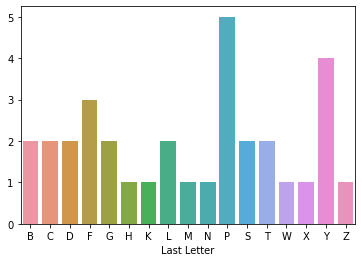

In [5]:
# this code creates the visual below
classroom['Last Letter'] = classroom['Last Name'].apply(first_let)
grouped_last = classroom.groupby('Last Letter').count()
grouped_last = grouped_last['First Name']
sns.barplot(x = grouped_last.index, y = grouped_last.values);

## Can we find you on TikTok, Instagram, Twitter... maybe LinkedIn?

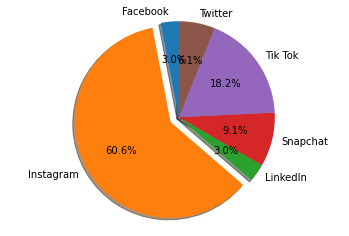

In [6]:
grouped_social = classroom.groupby('Social').count()
grouped_soc = grouped_social['First Name']

labels = grouped_soc.index
sizes = grouped_soc.values
exp = [0.1 if i==max(sizes) else 0 for i in sizes]  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=exp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## CS is cool, but Art's where it's at!

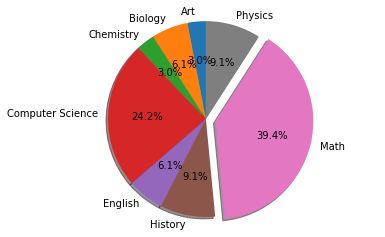

In [7]:
grouped_subj = classroom.groupby('Subject').count()
grouped_sub = grouped_subj['First Name']

labels = grouped_sub.index
sizes = grouped_sub.values
exp = [0.1 if i==max(sizes) else 0 for i in sizes]  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=exp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## They say that if you like Computer Science you probably like the color Blue. But is that true?

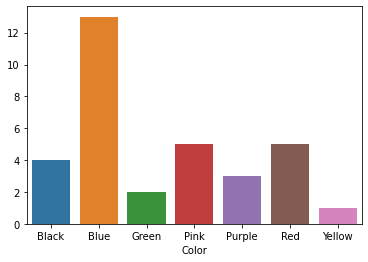

In [8]:
# this code creates the visual below
grouped_col = classroom.groupby('Color').count()
grouped_color = grouped_col['First Name']
sns.barplot(x = grouped_color.index, y = grouped_color.values);

## How many hours of sleep is everyone getting?

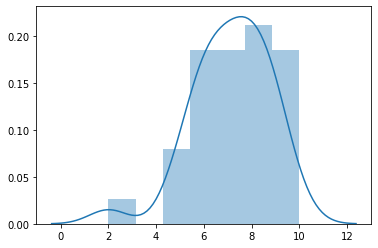

In [9]:
sns.distplot(classroom['Sleep'].values);

## Does study time take away your sleep time?

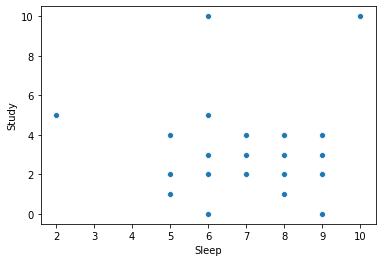

In [10]:
sns.scatterplot(x = 'Sleep', y = 'Study', data = classroom);

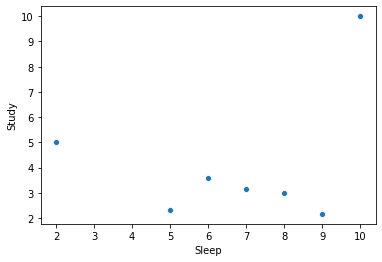

In [11]:
# run in case you need to bin scatter above scatterplot
# most likely will have to in order to make meaning of above^
grouped_sleep1 = classroom.groupby('Sleep').mean()
grouped_sleep2 = grouped_sleep1.reset_index()
sns.scatterplot(x = 'Sleep', y = 'Study', data = grouped_sleep2);

## Which year is the tallest? 

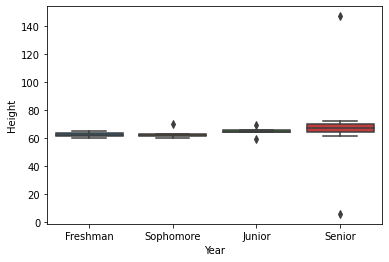

In [12]:
def year(x):
    if x == 'Sophomore':
        return 2
    if x == 'Freshman':
        return 1
    if x == 'Junior':
        return 3
    if x == 'Senior':
        return 4
    
boxplt = classroom[['Year', 'Height']].copy()
boxplt['Map'] = boxplt['Year'].apply(year)
boxplt_sorted = boxplt.sort_values(by='Map')
ax = sns.boxplot(x = 'Year', y = 'Height', data = boxplt_sorted);

## If you're tall, do you tend to have a big shoe size?

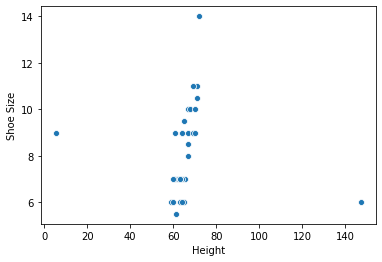

In [13]:
sns.scatterplot(x = 'Height', y = 'Shoe Size', data = classroom);